In [1]:
import torch as t
from torch import nn
from torch.autograd import Variable as V

In [8]:
# 全连接层
class Linear(nn.Module):
    def __init__(self, in_features, out_feachers):
        super(Linear,self).__init__()
        self.w = nn.Parameter(t.randn(in_features, out_feachers))
        self.b = nn.Parameter(t.randn(out_feachers))
        
    def forward(self,x):
        x = x.mm(self.w)
        return x + self.b.expand_as(x)

In [9]:
layer = Linear(4,3)
input = V(t.randn(2,4))
output = layer(input)
output

tensor([[-2.4168, -1.5605, -0.6193],
        [-0.2350, -1.8335, -0.0244]], grad_fn=<AddBackward0>)

In [10]:
for name, parameter in layer.named_parameters():
    print(name,parameter)

w Parameter containing:
tensor([[-0.9723, -1.3649,  0.7539],
        [ 0.7895,  0.5139, -0.0272],
        [-1.0766, -1.8342, -0.5553],
        [ 1.2742, -0.4446,  1.2423]], requires_grad=True)
b Parameter containing:
tensor([ 0.5736,  0.7007, -0.6341], requires_grad=True)


In [11]:
# 多层感知机
class Perceptron(nn.Module):
    def __init__(self,in_features,hidden_features,out_features):
        nn.Module.__init__(self)
        self.layer1 = Linear(in_features,hidden_features)
        self.layer2 = Linear(hidden_features,out_features)
        
    def forward(self,x):
        x = self.layer1(x)
        x = t.sigmoid(x)
        return self,layer2(x)

In [16]:
perceptron = Perceptron(3,4,1)
for name,para in perceptron.named_parameters():
    print(name, para)

layer1.w Parameter containing:
tensor([[ 1.2729,  1.3561, -0.4139, -0.2744],
        [-0.5673, -1.5562, -1.1388,  1.7860],
        [ 1.3327, -0.3037, -0.7080,  1.1883]], requires_grad=True)
layer1.b Parameter containing:
tensor([ 0.1247,  1.5324, -0.0688,  0.2719], requires_grad=True)
layer2.w Parameter containing:
tensor([[ 0.3315],
        [-0.1685],
        [ 0.1887],
        [-0.2934]], requires_grad=True)
layer2.b Parameter containing:
tensor([-0.0896], requires_grad=True)


In [17]:
# 常用神经网络层
# 图像相关层

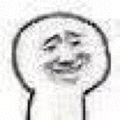

In [27]:
from PIL import Image
from torchvision.transforms import ToTensor, ToPILImage
to_tensor = ToTensor()
to_pil = ToPILImage()
sample = Image.open('sample0.jpg')
sample

In [30]:
input = to_tensor(sample).unsqueeze(0)
input.shape

torch.Size([1, 3, 120, 120])

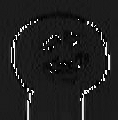

In [32]:
kernal = t.ones(3,3)/-9
kernal[1][1] = 1
conv = nn.Conv2d(1,1,(3,3),1,bias=False)
conv.weight.data = kernal.view(1,3,1,3)
out = conv(V(input))
to_pil(out.data.squeeze(0))

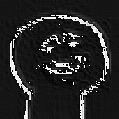

In [41]:
kernal = t.ones(3,4)/-12
kernal[1][1] = 1
conv = nn.Conv2d(1,1,(3,3),1,bias=False)
conv.weight.data = kernal.view(1,3,2,2)
out = conv(V(input))
to_pil(out.data.squeeze(0))

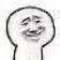

In [42]:
pool = nn.AvgPool2d(2,2)
out = pool(V(input))
to_pil(out.data.squeeze(0))

In [43]:
input = V(t.randn(2,3))
linear = nn.Linear(3,4)
h = linear(input)
h

tensor([[ 0.2455,  0.0950,  0.3898,  0.1854],
        [-0.9290,  0.0034,  0.4974, -0.8045]], grad_fn=<AddmmBackward>)

In [45]:
bn = nn.BatchNorm1d(4)
bn.weight.data = t.ones(4)*4
bn.bias.data = t.zeros(4)
bn_out = bn(h)
bn_out.mean(0),bn_out.var(0, unbiased=False)

(tensor([0., 0., 0., 0.], grad_fn=<MeanBackward2>),
 tensor([15.9995, 15.9240, 15.9449, 15.9993], grad_fn=<VarBackward1>))

In [46]:
class MyModule(nn.Module):
    def __init__(self):
        super(MyModule,self).__init__()
        self.list = [nn.Linear(3,4),nn.ReLU()]
        self.module_list = nn.ModuleList([nn.Conv2d(2,3,3),nn.ReLU()])
        
    def forward(self):
        pass
    
model = MyModule()
model

MyModule(
  (module_list): ModuleList(
    (0): Conv2d(2, 3, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
)

In [47]:
for name, para in model.named_parameters():
    print(name,para.size())
    

module_list.0.weight torch.Size([3, 2, 3, 3])
module_list.0.bias torch.Size([3])


In [48]:
t.manual_seed(1000)
input = V(t.randn(2,3,4))
# batch_size=3,序列长度2，序列中每隔元素占4维
lstm = nn.LSTM(4,3,1)
# 输入向量4维，3个隐藏元，1层
h0 = V(t.randn(1,3,3))
c0 = V(t.randn(1,3,3))
# 初始状态，1层，batch_size3，隐藏元3
out, hn = lstm(input,(h0,c0))
out

tensor([[[-0.3610, -0.1643,  0.1631],
         [-0.0613, -0.4937, -0.1642],
         [ 0.5080, -0.4175,  0.2502]],

        [[-0.0703, -0.0393, -0.0429],
         [ 0.2085, -0.3005, -0.2686],
         [ 0.1482, -0.4728,  0.1425]]], grad_fn=<StackBackward>)

In [49]:
embedding = nn.Embedding(4,5)
# 4个词，每隔用5维向量表示
embedding.weight.data = t.arange(0,20).view(4,5)

In [50]:
input = V(t.arange(3,0,-1)).long()
output = embedding(input)
output

tensor([[15, 16, 17, 18, 19],
        [10, 11, 12, 13, 14],
        [ 5,  6,  7,  8,  9]], grad_fn=<EmbeddingBackward>)

In [51]:
# 优化器

In [58]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2)
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(16*5*5,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,10)
        )
        
    def forward(self,x):
        x = self.features(x)
        x = x.view(-1,16*5*5)
        x = self.classifier(x)
        return x
        
net = Net()

In [59]:
from torch import optim
optimizer = optim.SGD(params=net.parameters(),lr=1)
optimizer.zero_grad()

input = V(t.randn(1,3,32,32))
output = net(input)
output.backward(output)

optimizer.step()

In [60]:
optimizer = optim.SGD([
    {'params':net.features.parameters()},
    {'params':net.classifier.parameters(),'lr':1e-2}
],lr=1e-5)

In [62]:
special_layers = nn.ModuleList([net.classifier[0],net.classifier[3]])
special_layers_params = list(map(id,special_layers.parameters()))
base_params = filter(lambda p:id(p) not in special_layers_params,
                    net.parameters())

optimizer = t.optim.SGD([
    {'params':base_params},
    {'params':special_layers.parameters(),'lr':0.01}
],lr=0.001)

In [63]:
from torch.nn import functional as F

In [64]:
from torch.nn import init